### Import Dependencies

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Collection & Pre-Processiong

In [5]:
# Loading the data from csv file to dataframe
raw_mail_data=pd.read_csv('data/mail_data.csv')

In [6]:
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
raw_mail_data.shape

(5572, 2)

In [12]:
# Replace the null values with a null string
mail_data = raw_mail_data.where(pd.notnull(raw_mail_data),'')

In [17]:
# Showing the duplicated values
mail_data[mail_data.duplicated()]

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [21]:
# Drop dulicated Rows
mail_data=mail_data.drop_duplicates(keep='first')

#### Label Encoding

In [22]:
# I will label spam mail as 0 and ham mail as 1
mail_data.loc[mail_data['Category']=='spam', 'Category',]=0
mail_data.loc[mail_data['Category']=='ham', 'Category',]=1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18132\2996160976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_data.loc[mail_data['Category']=='spam', 'Category',]=0
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18132\2996160976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_data.loc[mail_data['Category']=='ham', 'Category',]=1


spam = 0 </br>
ham = 1

In [26]:
mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [28]:
mail_data.shape

(5157, 2)

In [24]:
# Seperating the data as texts and label 
x = mail_data['Message']
y= mail_data['Category']

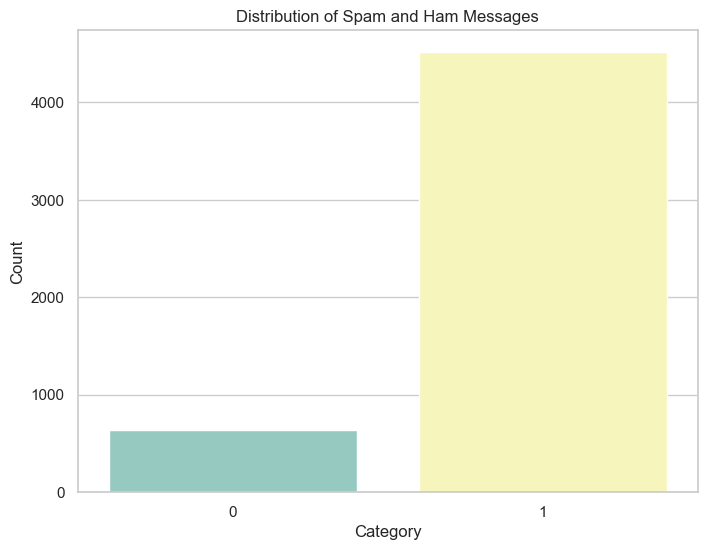

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart to visualize the message categories
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=mail_data, x='Category', palette="Set3")
plt.title("Distribution of Spam and Ham Messages")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()



In [30]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [27]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: object

In [31]:
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=3)

In [37]:
print("x shape :",x.shape)
print("x_train shape :",x_train.shape)
print("x_test shape :",x_test.shape)

x shape : (5157,)
x_train shape : (4125,)
x_test shape : (1032,)


#### Feature Extraction

In [40]:
# Transform the text data to feature vectors that can be used as input to the logistic Regression

features_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

x_train_features=features_extraction.fit_transform(x_train)
x_test_features=features_extraction.transform(x_test)


# Convert y_train and y_test as integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [43]:
print(x_train_features)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

## Training The model

In [44]:
model = LogisticRegression()

In [45]:
# Training the logistic Regression with the training data
model.fit(x_train_features,y_train)

LogisticRegression()

### Evaluate the model

In [46]:
# Prediction on training data

prediction_train =model.predict(x_train_features)
accuracy = accuracy_score(y_train,prediction_train)

In [47]:
accuracy

0.961939393939394

In [48]:
# Prediction on test data

prediction_test =model.predict(x_test_features)
accuracy_test = accuracy_score(y_test,prediction_test)

In [49]:
accuracy_test

0.9544573643410853

## Deployment

In [56]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = features_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
    print('Ham mail')

else:
    print('Spam mail')

[1]
Ham mail
